# WeatherPy
----

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

The first requirement is to create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot, add a sentence or two explaining what the code is analyzing.

The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# !pip install citipy

In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
responses = []
counter = 0

city_name=[]
lat=[]
lng=[]
maxtemp=[]
humidity=[]
cloudiness=[]
windspeed=[]
country=[]
date=[]

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=31b655b944cbf9ac26233bd3870c7ad5&units=imperial&q=


In [4]:
print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for city in cities:
    counter += 1
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    
    
        print(f'Processing Record {counter} | {city}')
    except KeyError:
        print("City not found. Skipping...")
        pass

    

Beginning Data Retrieval
-----------------------------
Processing Record 1 | rikitea
Processing Record 2 | jamestown
Processing Record 3 | san vicente
City not found. Skipping...
Processing Record 5 | hofn
Processing Record 6 | mahebourg
Processing Record 7 | ushuaia
Processing Record 8 | sao sebastiao do paraiso
Processing Record 9 | balancan
Processing Record 10 | marsa matruh
Processing Record 11 | pevek
Processing Record 12 | baglung
Processing Record 13 | karratha
Processing Record 14 | boa vista
Processing Record 15 | pokrovsk
Processing Record 16 | hvolsvollur
Processing Record 17 | hasaki
Processing Record 18 | chancay
City not found. Skipping...
Processing Record 20 | palu
Processing Record 21 | punta arenas
Processing Record 22 | hobart
Processing Record 23 | georgetown
Processing Record 24 | vestmannaeyjar
Processing Record 25 | nodeland
Processing Record 26 | nanortalik
City not found. Skipping...
Processing Record 28 | launceston
Processing Record 29 | klaksvik
Processing 

Processing Record 252 | codrington
Processing Record 253 | anchorage
Processing Record 254 | san policarpo
Processing Record 255 | jimenez
Processing Record 256 | aswan
Processing Record 257 | bandarbeyla
Processing Record 258 | santa cruz
Processing Record 259 | yumen
Processing Record 260 | stokmarknes
Processing Record 261 | alta floresta
Processing Record 262 | pumiao
Processing Record 263 | goderich
Processing Record 264 | rosario
Processing Record 265 | la libertad
Processing Record 266 | longyearbyen
Processing Record 267 | cordoba
City not found. Skipping...
Processing Record 269 | hambantota
Processing Record 270 | ilulissat
Processing Record 271 | saldanha
City not found. Skipping...
Processing Record 273 | laguna
Processing Record 274 | lavrentiya
Processing Record 275 | nantucket
Processing Record 276 | itarema
Processing Record 277 | walvis bay
Processing Record 278 | alekseyevsk
City not found. Skipping...
Processing Record 280 | puerto carreno
Processing Record 281 | bos

Processing Record 501 | lang son
Processing Record 502 | nacala
Processing Record 503 | lompoc
Processing Record 504 | boyolangu
Processing Record 505 | sechura
City not found. Skipping...
Processing Record 507 | alakurtti
Processing Record 508 | santa rosalia
Processing Record 509 | sidi ali
Processing Record 510 | luba
City not found. Skipping...
Processing Record 512 | panzhihua
Processing Record 513 | ornskoldsvik
Processing Record 514 | bulungu
Processing Record 515 | narasannapeta
Processing Record 516 | russell
City not found. Skipping...
Processing Record 518 | lethem
Processing Record 519 | ust-tsilma
Processing Record 520 | bogorodskoye
Processing Record 521 | crofton
Processing Record 522 | neuquen
Processing Record 523 | ostrovnoy
Processing Record 524 | lukulu
Processing Record 525 | jalali
Processing Record 526 | leningradskiy
Processing Record 527 | lahij
Processing Record 528 | youhao
Processing Record 529 | roma
Processing Record 530 | salta
Processing Record 531 | hom

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City" : city_name,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : maxtemp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : windspeed,
    "Country" : country,
    "Date" : date  
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.81,67,12,9.48,PF,1612768182
1,Jamestown,42.0970,-79.2353,10.99,85,90,3.44,US,1612767939
2,San Vicente,-26.6167,-54.1333,60.53,89,0,3.87,AR,1612768183
3,Hofn,64.2539,-15.2082,36.97,79,100,13.69,IS,1612768183
4,Mahébourg,-20.4081,57.7000,86.00,62,40,13.80,MU,1612768183


In [6]:
# grp_weather_data = weather_Data.grp.aggregate([])
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,20.717658,19.922206,49.264051,73.367089,53.822785,8.615787,1.612768e+09
std,33.868661,89.592482,32.348588,19.565594,39.942999,5.977155,7.600833e+01
min,-54.800000,-179.166700,-36.990000,10.000000,0.000000,0.270000,1.612768e+09
25%,-6.416700,-57.557500,26.010000,64.000000,9.000000,4.050000,1.612768e+09
50%,25.286700,21.024700,59.790000,78.000000,65.000000,6.910000,1.612768e+09
75%,50.033400,100.335400,75.630000,88.000000,94.000000,12.240000,1.612768e+09
max,78.218600,179.316700,98.600000,100.000000,100.000000,40.290000,1.612768e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
overhumidity_df = weather_data.loc[weather_data["Humidity"]>100]
overhumidity_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


Since overhumidity_df is empty the loc step, we know that there is no cities with humidity recorded over 100%


In [8]:
# Having checked for missing or incorrect values, export data

weather_data.to_csv('output_files/cleaned_weather.csv', index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
from datetime import datetime
current_date = datetime.today().strftime('%Y-%m-%d')


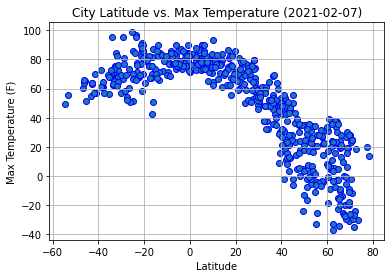

In [10]:
x_values = weather_data["Lat"]
y_values = weather_data["Max Temp"]

plt.scatter(x_values,y_values, edgecolors = 'b')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({current_date})")
plt.grid()
plt.show()



## Latitude vs. Humidity Plot

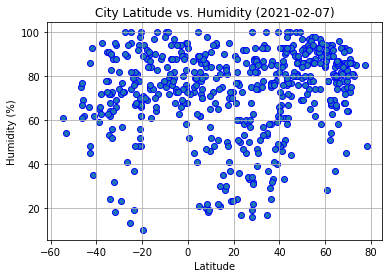

In [11]:
x_values = weather_data["Lat"]
y_values = weather_data["Humidity"]

plt.scatter(x_values,y_values, edgecolors = 'b')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

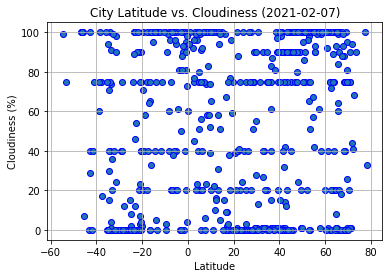

In [12]:
x_values = weather_data["Lat"]
y_values = weather_data["Cloudiness"]

plt.scatter(x_values,y_values, edgecolors = 'b')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

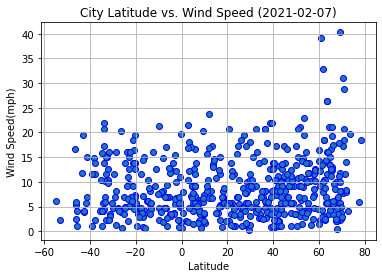

In [13]:
x_values = weather_data["Lat"]
y_values = weather_data["Wind Speed"]

plt.scatter(x_values,y_values, edgecolors = 'b')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.grid()
plt.show()

## Linear Regression

In [14]:
north_weather_data = weather_data.loc[weather_data["Lat"] > 0]
south_weather_data = weather_data.loc[weather_data["Lat"] < 0]

The r-value or correlation between City Latitude vs. Max Temperature in the Northern Hemisphere is -0.872


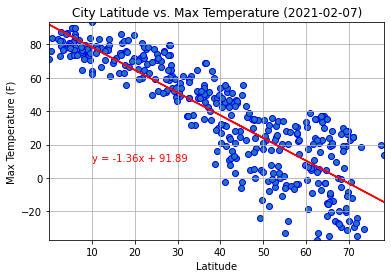

In [17]:
# Calculate the correlation coefficient and linear regression model 

x_values = north_weather_data["Lat"]
y_values = north_weather_data["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value or correlation between City Latitude vs. Max Temperature in the Northern Hemisphere is {"{:.3f}".format(rvalue)}')

plt.scatter(x_values,y_values, edgecolors = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({current_date})")

plt.grid()

plt.margins(0,0)
plt.savefig("output_files/northcitylat_maxtemp.png", bbox_inches = 'tight',
    pad_inches = 0)

plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Note a negative correlation between Max Temperatures and Latitude from Northern Hemisphere. Meaning the further north, the lower the temperature, which falls in line with our expectations.

The r-value or correlation between City Latitude vs. Max Temperature in the Southern Hemisphere is 0.520


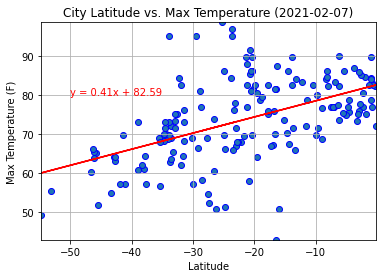

In [19]:
# Calculate the correlation coefficient and linear regression model 

x_values = south_weather_data["Lat"]
y_values = south_weather_data["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value or correlation between City Latitude vs. Max Temperature in the Southern Hemisphere is {"{:.3f}".format(rvalue)}')

plt.scatter(x_values,y_values, edgecolors = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({current_date})")

plt.grid()

plt.margins(0,0)
plt.savefig("output_files/southcitylat_maxtemp.png", bbox_inches = 'tight',
    pad_inches = 0)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Note a positive correlation between Max Temperatures and Latitude from Southern Hemisphere. Meaning the further north, the higher the temperature, which falls in line with our expectations since the closer to the equator, the higher the temperature.

The r-value or correlation between City Latitude vs. Humidity in the Northern Hemisphere is 0.303


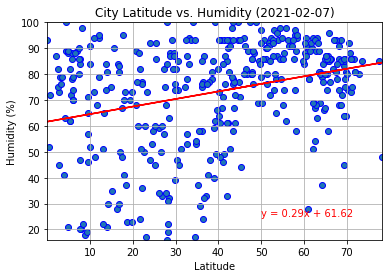

In [20]:
# Calculate the correlation coefficient and linear regression model 

x_values = north_weather_data["Lat"]
y_values = north_weather_data["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value or correlation between City Latitude vs. Humidity in the Northern Hemisphere is {"{:.3f}".format(rvalue)}')

plt.scatter(x_values,y_values, edgecolors = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,25),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({current_date})")

plt.grid()

plt.margins(0,0)
plt.savefig("output_files/northcitylat_humidity.png", bbox_inches = 'tight',
    pad_inches = 0)

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Note a positive correlation between Humidity and Latitude from Northern Hemisphere. Meaning the further north, the higher the humidity.

The r-value or correlation between City Latitude vs. Humidity in the Sourthern Hemisphere is 0.299


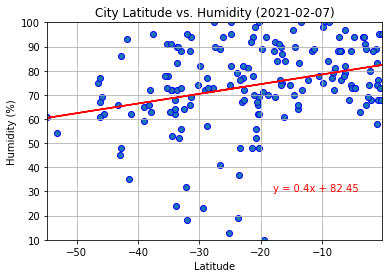

In [21]:
# Calculate the correlation coefficient and linear regression model 

x_values = south_weather_data["Lat"]
y_values = south_weather_data["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value or correlation between City Latitude vs. Humidity in the Sourthern Hemisphere is {"{:.3f}".format(rvalue)}')

plt.scatter(x_values,y_values, edgecolors = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-18,30),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({current_date})")

plt.grid()

plt.margins(0,0)
plt.savefig("output_files/southcitylat_humidity.png", bbox_inches = 'tight',
    pad_inches = 0)

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Note a positive correlation between Humidity and Latitude from Southern Hemisphere. Meaning the further south, the lower the humidity.

The r-value or correlation between City Latitude vs. Cloudiness in the Northern Hemisphere is 0.111


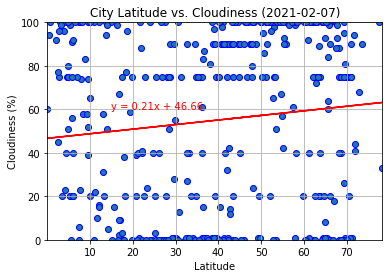

In [22]:
# Calculate the correlation coefficient and linear regression model 

x_values = north_weather_data["Lat"]
y_values = north_weather_data["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value or correlation between City Latitude vs. Cloudiness in the Northern Hemisphere is {"{:.3f}".format(rvalue)}')

plt.scatter(x_values,y_values, edgecolors = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,60),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({current_date})")

plt.grid()

plt.margins(0,0)
plt.savefig("output_files/northcitylat_cloudiness.png", bbox_inches = 'tight',
    pad_inches = 0)

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Note a positive correlation between Cloudiness and Latitude from Northern Hemisphere. Meaning we can expect that the further north, the higher percentage of cloudiness.

The r-value or correlation between City Latitude vs. Cloudiness in the Southern Hemisphere is 0.133


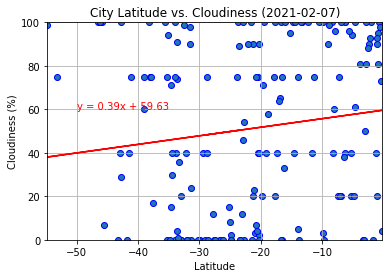

In [23]:
# Calculate the correlation coefficient and linear regression model 

x_values = south_weather_data["Lat"]
y_values = south_weather_data["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value or correlation between City Latitude vs. Cloudiness in the Southern Hemisphere is {"{:.3f}".format(rvalue)}')

plt.scatter(x_values,y_values, edgecolors = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({current_date})")

plt.grid()

plt.margins(0,0)
plt.savefig("output_files/southcitylat_cloudiness.png", bbox_inches = 'tight',
    pad_inches = 0)

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Note a positive correlation between Cloudiness and Latitude from Southern Hemisphere. Meaning we can expect that the further south, the lower percentage of cloudiness.

The r-value or correlation between City Latitude vs. Wind Speed in the Northern Hemisphere is 0.176


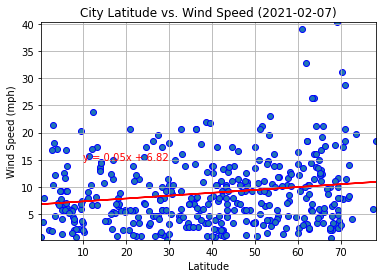

In [24]:
# Calculate the correlation coefficient and linear regression model 

x_values = north_weather_data["Lat"]
y_values = north_weather_data["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value or correlation between City Latitude vs. Wind Speed in the Northern Hemisphere is {"{:.3f}".format(rvalue)}')

plt.scatter(x_values,y_values, edgecolors = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({current_date})")

plt.grid()

plt.margins(0,0)
plt.savefig("output_files/northcitylat_windspeed.png", bbox_inches = 'tight',
    pad_inches = 0)

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
Note a slightly positive correlation between Wind Speed and Latitude from Northern Hemisphere. Meaning that the further north, the more likely we can expect a higher wind speed (mph).

The r-value or correlation between City Latitude vs. Wind Speed in the Southern Hemisphere is -0.066


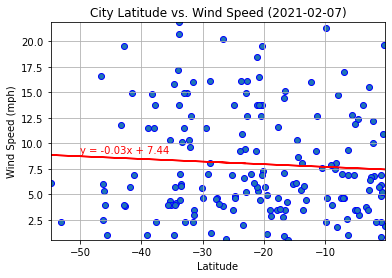

In [25]:
# Calculate the correlation coefficient and linear regression model 

x_values = south_weather_data["Lat"]
y_values = south_weather_data["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-value or correlation between City Latitude vs. Wind Speed in the Southern Hemisphere is {"{:.3f}".format(rvalue)}')

plt.scatter(x_values,y_values, edgecolors = 'b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,9),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({current_date})")

plt.grid()

plt.margins(0,0)
plt.savefig("output_files/southcitylat_windspeed.png", bbox_inches = 'tight',
    pad_inches = 0)

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Note a slightly negative correlation between Wind Speed and Latitude from Southern Hemisphere. Meaning that the further south, the more likely we can expect a lower wind speed (mph).